In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [3]:
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [4]:
corr = pd.DataFrame(X_train).corr(method='spearman')
print(corr)

          0         1         2         3
0  1.000000 -0.152447  0.873083  0.814770
1 -0.152447  1.000000 -0.304345 -0.299576
2  0.873083 -0.304345  1.000000  0.939317
3  0.814770 -0.299576  0.939317  1.000000


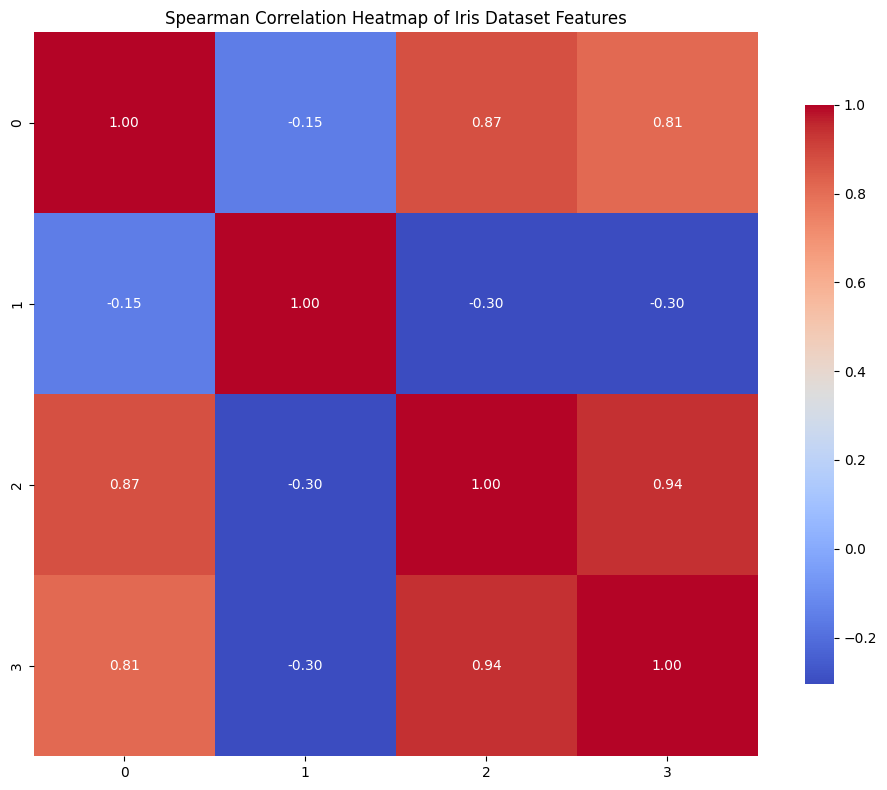

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Spearman Correlation Heatmap of Iris Dataset Features')
plt.tight_layout()
plt.show()

In [ ]:
def brute_force_feature_selection(df, threshold=0.9):
    """
    Removes features that are highly correlated using a brute-force approach.
    """
    correlated_features = set()
    correlation_matrix = df.corr()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    return df.drop(columns=correlated_features)

# Apply Brute Force selection
df_brute_force = brute_force_feature_selection(df)
print("Remaining features after Brute Force selection:")
print(df_brute_force.columns)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def group_based_feature_selection(df, y, threshold=0.9):
    """
    Groups correlated features and selects the most important one.
    """
    correlation_matrix = df.corr()
    groups = []  # To store groups of correlated features
    selected_features = set(df.columns)  # Start with all features

    # Identify groups of correlated features
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                group = set([correlation_matrix.columns[i], correlation_matrix.columns[j]])
                groups.append(group)

    # Train a model to get feature importances
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(df, y)
    feature_importance = dict(zip(df.columns, model.feature_importances_))

    # Select the most important feature from each group
    for group in groups:
        best_feature = max(group, key=lambda x: feature_importance[x])  # Select the highest importance
        selected_features -= group  # Remove all
        selected_features.add(best_feature)  # Add only the best one

    return df[list(selected_features)]

# Apply Group-Based Selection
df_group_based = group_based_feature_selection(df, iris.target)
print("Remaining features after Group-Based selection:")
print(df_group_based.columns)
